# Polynomial Regression

In [36]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../../../../Data/cleaned_dataset.csv')

# See if I'm doing this right
df.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,Real Oil Prices
0,12.962951,12.750812,5.803950,19.534471,17.325209,5.952564,6.137924,6.101171,6.327298,5.854031,...,5.861682,3.571677,3.772941,3.498251,6.104337,15.967271,17.533756,9.539485,4.091742,13.715729
1,12.965336,12.751983,5.806582,19.540266,17.320880,5.964607,6.150103,6.113980,6.340179,5.883401,...,5.865968,3.575312,3.782409,3.500802,6.247928,15.942881,17.542367,9.549875,4.019942,13.601725
2,12.970718,12.755952,5.807793,19.549848,17.329560,5.975704,6.160908,6.124948,6.353748,5.910003,...,5.871375,3.580145,3.783457,3.505891,6.270529,15.972082,17.542547,9.562213,4.016897,14.512195
3,12.978406,12.763876,5.815217,19.537241,17.337448,5.980389,6.168790,6.133329,6.363083,5.954359,...,5.873100,3.581351,3.783457,3.509696,6.307429,15.924905,17.543025,9.580477,3.880490,15.017895
4,12.984426,12.770292,5.819106,19.552370,17.341493,5.981250,6.165329,6.128931,6.356100,5.934182,...,5.875166,3.586164,3.794936,3.512227,6.329124,15.943545,17.556218,9.597480,3.882946,15.981442


## Model Features & Training

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 'Real Oil Prices' is the target column
X = df.drop('Real Oil Prices', axis=1)
y = df['Real Oil Prices']

# Split the data into training and testing sets
# 80% of the data will be used for training, 20% for testing (0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 3  # Degree of the polynomial we want to fit
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train the model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions
poly_predictions = poly_model.predict(X_poly_test)

### Evaluate

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, poly_predictions)
mse = mean_squared_error(y_test, poly_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, poly_predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1.80149833301248
Mean Squared Error: 5.474859874374718
Root Mean Squared Error: 2.3398418481544256
R^2 Score: 0.9179078330799219


### Visualize

##### Actual vs Predicted

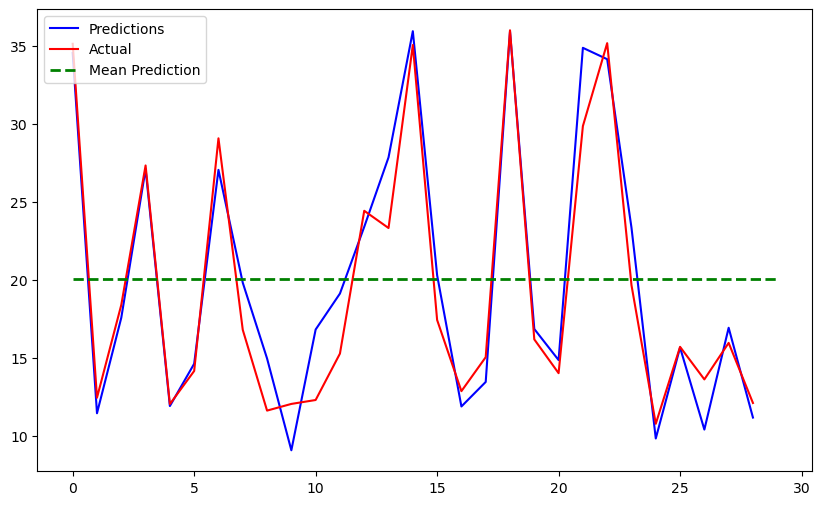

In [39]:
import matplotlib.pyplot as plt

# Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.plot(poly_predictions, label='Predictions', color='blue')
plt.plot(y_test.values, label='Actual', color='red')
plt.plot([0, len(y_test)], [poly_predictions.mean(), poly_predictions.mean()], '--', lw=2, color='green', label='Mean Prediction')
plt.legend(loc='upper left')
plt.show()

##### Learning Curve

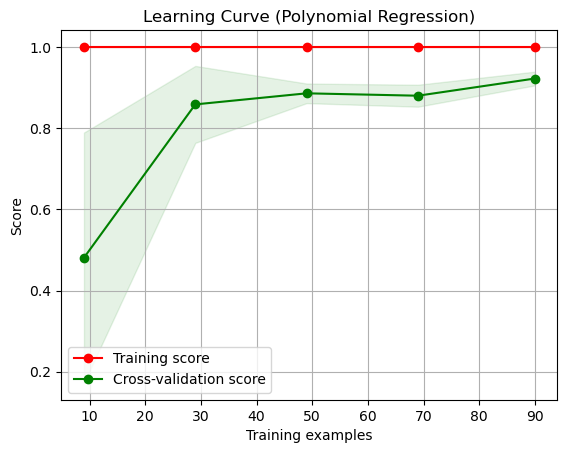

In [40]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

plot_learning_curve(poly_model, "Learning Curve (Polynomial Regression)", X_poly_train, y_train, cv=5)
plt.show()